### 머신러닝 회귀
* 머신러닝
    - 분류
        - 떨어져 있는 수
        - 범주형 자료
    - 회귀
        - 연속적인 수

* 머신러닝 회귀        
    * knn regressor
    * dt regressor
    * rf regressor
    * svm regressor
    

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
def seldata(cols=['sday','sopen','shigh','slow','sclose','svol'],where='where sday>"2022-01-01" order by sday asc'):
    fname='_db/nstock.db'
    with sqlite3.connect(fname) as conn:
        cur=conn.cursor()
        coltxt=','.join(cols)
        sql='select '+coltxt+' from stockdb '+where
        #print(sql)
        res=cur.execute(sql).fetchall()
    return res

res=seldata(where=' order by sday asc')    
res[:5]

[('1996-12-26', 23000, 23000, 23000, 23000, 0),
 ('1996-12-27', 23000, 23000, 23000, 23000, 0),
 ('1997-01-03', 20000, 20100, 20000, 20000, 145680),
 ('1997-01-04', 20000, 20000, 20000, 20000, 277690),
 ('1997-01-06', 20000, 20000, 20000, 20000, 436190)]

In [12]:
cols=['sday','sopen','shigh','slow','sclose','svol']
df = pd.DataFrame(res,columns=cols)
mdf=df.set_index('sday')
mdf.tail()

,sopen,shigh,slow,sclose,svol
sday,,,,,
2022-05-06,108000,108500,106500,107500,2566813
2022-05-09,107000,109000,106500,107500,2203472
2022-05-10,107000,111000,107000,110000,4141923
2022-05-11,110500,112500,108000,110500,3658168
2022-05-12,109500,111500,108500,110500,1938788


In [33]:
k=5
slist=list(mdf[['sopen','shigh','slow','sclose','svol']].rolling(5))
ylist=mdf['sclose'].values
print(slist[11])
print(ylist[11])
print(len(slist),len(ylist))

            sopen  shigh   slow  sclose     svol
sday                                            
1997-01-09  20000  20100  20000   20000   203650
1997-01-10  20000  20100  20000   20000  2144420
1997-01-11  20100  20100  20000   20000    69610
1997-01-13  20000  20100  20000   20000    94400
1997-01-14  20100  21000  20000   20900   399790
20900
6348 6348


In [93]:
Y=[]
X=[]
for i in range(len(slist)-1):
    ns=np.array(slist[i].values).reshape(-1)
    X.append(ns)
    Y.append(ylist[i+1])

In [94]:
print(X[10],Y[10])

[  20000   20000   20000   20000  206320   20000   20100   20000   20000
  203650   20000   20100   20000   20000 2144420   20100   20100   20000
   20000   69610   20000   20100   20000   20000   94400] 20900


In [101]:
from sklearn.model_selection import train_test_split
cutratio=0.2
X_train,X_test=train_test_split(X[5:],test_size=cutratio,shuffle=False,stratify=None)
Y_train,Y_test=train_test_split(Y[5:],test_size=cutratio,shuffle=False,stratify=None)
print(len(X),len(X_train),len(X_test),len(Y),len(Y_train),len(Y_test))

6347 5073 1269 6347 5073 1269


In [102]:
print(X_test[:2],Y_test[:2])

[array([  49100,   49300,   48050,   48800, 3439908,   48800,   49300,
         47900,   48000, 3728263,   48200,   48850,   48000,   48000,
       2957372,   48100,   49550,   47500,   49200, 3849912,   49550,
         51100,   49300,   51000, 4948062], dtype=int64), array([  48800,   49300,   47900,   48000, 3728263,   48200,   48850,
         48000,   48000, 2957372,   48100,   49550,   47500,   49200,
       3849912,   49550,   51100,   49300,   51000, 4948062,   51800,
         51900,   50300,   50300, 4024138], dtype=int64)] [50300, 48800]


In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
n=3
rmses=[]
for k in range(2,20):
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(np.array(X_train),np.array(Y_train))
    pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(Y_test,pred))
    rmses.append(rmse)

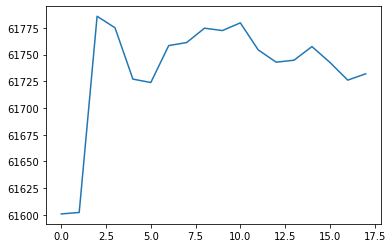

In [106]:
plt.plot(range(len(rmses)),rmses)

In [108]:
bestk=2
model=KNeighborsRegressor(n_neighbors=bestk)
model.fit(np.array(X_train),np.array(Y_train))
pred=model.predict(X_test)
print(len(pred),len(Y_test))

1269 1269


<AxesSubplot:>

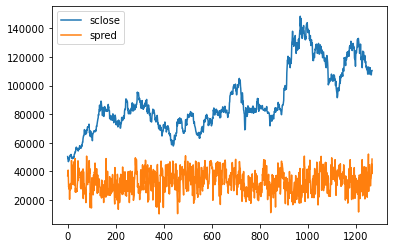

In [110]:
sdf=pd.DataFrame({'sclose':Y_test,'spred':pred})
sdf.plot()